# Minions on the Board Detection

In [4]:
import skimage
import skimage.io
import skimage.transform
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from hearthstone.processing import Factory
import hearthstone.sides as hsd

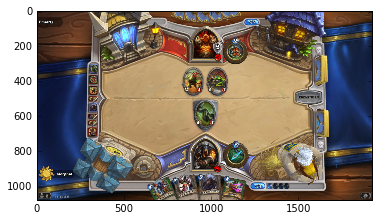

In [96]:
img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-13-17 11.45.15.png')

img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)
plt.imshow(img)

In [63]:
from hearthstone.processing import Factory

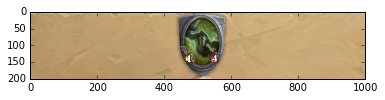

In [97]:
minions_image = Factory.cut_off_image(img, (450, 500), (1000, 200))

plt.imshow(minions_image)

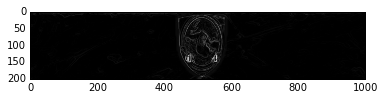

In [98]:
from skimage.filters import sobel
elevation_map = sobel(skimage.color.rgb2gray(minions_image))

plt.imshow(elevation_map, cmap=plt.cm.gray)

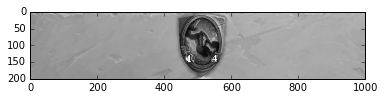

In [113]:
mi_gray = skimage.color.rgb2gray(minions_image)
# mi_gray = minions_image[:,:,1]

markers = np.zeros_like(mi_gray)
markers[mi_gray < 25] = 1
markers[mi_gray > 200] = 2

plt.imshow(mi_gray, cmap=plt.cm.gray)

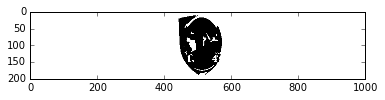

In [100]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

plt.imshow(segmentation, cmap=plt.cm.gray)

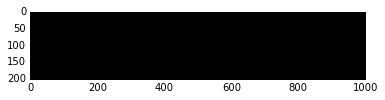

In [101]:
segmentation = ndimage.binary_fill_holes(segmentation - 1)

plt.imshow(segmentation, cmap=plt.cm.gray)

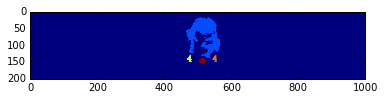

In [94]:
labeled, _ = ndimage.label(segmentation)

plt.imshow(labeled)

2

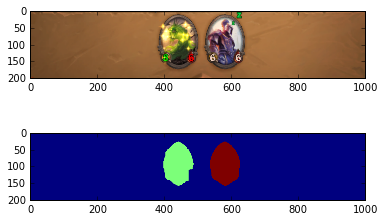

In [24]:
img = skimage.io.imread('../data/images/img032.png')

img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)
minions_image = Factory.cut_off_image(img, hsd.PLAYER_MINIONS.loc, hsd.PLAYER_MINIONS.shape)

minions_gray = skimage.color.rgb2gray(minions_image)
minions_sobel = skimage.filters.sobel(minions_gray)

segment = minions_sobel.copy()
segment[minions_sobel < 10.0 / 255.0] = 0
segment[minions_sobel >= 50.0 / 255.0] = 1
segment = ndimage.binary_fill_holes(segment)

segment = skimage.morphology.opening(segment, skimage.morphology.square(10))
segment = skimage.morphology.erosion(segment, skimage.morphology.square(30))

#plt.imshow(segment, cmap=plt.cm.gray)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].imshow(minions_image)
b = skimage.measure.label(segment)
ax[1].imshow(skimage.measure.label(segment))
len(np.unique(b)) - 1

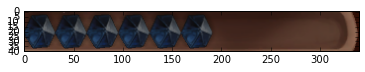

In [158]:
mana_bgr = Factory.cut_off_image(img, (1315, 980), (340, 40))

plt.imshow(mana_bgr)

6

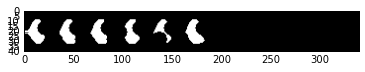

In [159]:
from skimage.filters import sobel
mana = mana_bgr[:, :, 0]
neg = np.zeros_like(mana)
neg[mana < 25] = 1

neg = sobel(neg)
neg = ndimage.binary_fill_holes(neg)

neg = skimage.morphology.erosion(neg, skimage.morphology.diamond(5))
neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(3))
neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(6))

plt.imshow(neg, cmap=plt.cm.gray)

b = skimage.measure.label(neg)
len(np.unique(b)) - 1